In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymysql
from sqlalchemy import create_engine
import getpass  
password = getpass.getpass()

········


In [45]:
data = pd.read_csv("wh_staff_dataset.csv")

In [46]:
data.head(1)

,year,name,gender,status,salary,pay_basis,position_title
0,1997,"Abedin,Huma M.",Female,Employee,27500.0,Per Annum,OFFICE MANAGER


In [47]:
data = data[["name","year","position_title", "gender", "status","pay_basis", "salary"]]

In [48]:
data.head(60)

,name,year,position_title,gender,status,pay_basis,salary
0,"Abedin,Huma M.",1997,OFFICE MANAGER,Female,Employee,Per Annum,27500.0
1,"Abrams,Lori E.",1997,"DEPUTY DIRECTOR, WHITE HOUSE GIFTS",Female,Employee,Per Annum,35000.0
2,"Alcorn,Brian A.",1997,ASSISTANT DIRECTOR FOR ADVANCE,Male,Employee,Per Annum,25000.0
3,"Allen,Jeannetta Pam",1997,STAFF ASSISTANT,Female,Employee,Per Annum,22000.0
4,"Allison,Donna Tate",1997,WHITE HOUSE TELEPHONE OPERATOR,Female,Employee,Per Annum,27624.0
5,"Alston,Mildred C.",1997,SPECIAL ASSISTANT PERSONAL CORRESPONDENCE,Female,Employee,Per Annum,47000.0
6,"Alterescu,Louis",1997,ATTORNEY - ADVISOR,Male,Detailee,Per Annum,73163.0
7,"Amador,Patricia",1997,ATTORNEY - ADVISOR,Female,Detailee,Per Annum,54629.0
8,"Amorsingh,Lucius Linus",1997,WHITE HOUSE TELEPHONE OPERATOR,Male,Employee,Per Annum,24858.0
9,"Anders,Brenda",1997,RADIO COORDINATOR,Female,Employee,Per Annum,31000.0


In [49]:
data.dtypes

name               object
year                int64
position_title     object
gender             object
status             object
pay_basis          object
salary            float64
dtype: object

In [50]:
data.shape

(10600, 7)

In [51]:
data.isna().sum()

name              3
year              0
position_title    2
gender            3
status            0
pay_basis         7
salary            5
dtype: int64

# Dealing with NaNs in gender and Salary column

In [52]:
data['gender'].value_counts(dropna=False)

Female    5595
Male      5002
NaN          3
Name: gender, dtype: int64

In [53]:
data['gender'] = data['gender'].fillna('Female')

In [54]:
data['gender'].value_counts(dropna=False)

Female    5598
Male      5002
Name: gender, dtype: int64

##### For salary

In [55]:
mean__salary = data['salary'].mean()

In [56]:
mean__salary

75185.34063237376

In [57]:
data['salary'] = data['salary'].fillna(mean__salary)

###### For pay basis

In [58]:
data['pay_basis'].value_counts(dropna=False)

Per Annum    10589
NaN              7
Per Diem         4
Name: pay_basis, dtype: int64

In [59]:
data['pay_basis'] = data['pay_basis'].fillna('Per Annum')

##### For position_title

In [60]:
len(data['position_title'].unique())

2397

In [61]:
data['position_title'].value_counts(dropna=False).head(20)

STAFF ASSISTANT                                                              623
ASSOCIATE DIRECTOR                                                           364
RECORDS MANAGEMENT ANALYST                                                   288
DEPUTY ASSOCIATE DIRECTOR                                                    220
EXECUTIVE ASSISTANT                                                          210
ASSOCIATE COUNSEL TO THE PRESIDENT                                           167
SPECIAL ASSISTANT TO THE PRESIDENT FOR LEGISLATIVE AFFAIRS                   163
SPECIAL ASSISTANT                                                            149
INFORMATION SERVICES OPERATOR                                                122
CORRESPONDENCE ANALYST                                                       102
ANALYST                                                                       99
SENIOR POLICY ADVISOR                                                         84
SPECIAL ASSISTANT TO THE PRE

In [62]:
data['position_title'] = data['position_title'].fillna('STAFF ASSISTANT')

##### For name

In [63]:
data['name'].value_counts(dropna=False)

McCathran,William W.      24
Trainor,Gregory T.        24
Kalbaugh,David E.         24
Williams,Sherman A.       24
Thomas,Edwin R.,III       24
                          ..
Albright,Craig M.          1
Amin,Vishal J.             1
Andrews,Alexandra S.       1
Avery,Tyson Mcallister     1
Yanick,Brittany M.         1
Name: name, Length: 4659, dtype: int64

In [64]:
 data = data.dropna()
data.shape

(10597, 7)

In [65]:
data.isna().sum()


name              0
year              0
position_title    0
gender            0
status            0
pay_basis         0
salary            0
dtype: int64

# Categorizing each worker to Administration under which they served

In [66]:

def admin(x):
    if x <2001:
        return 'Clinton Administration'
    elif x< 2009:
        return 'Bush administration'
    elif x <2017:
        return "Obama Administration"
    else:
        return 'Trump Administration'

In [67]:
data['served_under'] = data["year"].apply(admin)

In [68]:
data = data[["name","year","served_under","position_title", "gender", "status","pay_basis", "salary"]]

In [69]:
data

,name,year,served_under,position_title,gender,status,pay_basis,salary
0,"Abedin,Huma M.",1997,Clinton Administration,OFFICE MANAGER,Female,Employee,Per Annum,27500.0
1,"Abrams,Lori E.",1997,Clinton Administration,"DEPUTY DIRECTOR, WHITE HOUSE GIFTS",Female,Employee,Per Annum,35000.0
2,"Alcorn,Brian A.",1997,Clinton Administration,ASSISTANT DIRECTOR FOR ADVANCE,Male,Employee,Per Annum,25000.0
3,"Allen,Jeannetta Pam",1997,Clinton Administration,STAFF ASSISTANT,Female,Employee,Per Annum,22000.0
4,"Allison,Donna Tate",1997,Clinton Administration,WHITE HOUSE TELEPHONE OPERATOR,Female,Employee,Per Annum,27624.0
...,...,...,...,...,...,...,...,...
10595,"Young,Stewart B.",2020,Trump Administration,SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTO...,Male,Employee,Per Annum,120000.0
10596,"Zadrozny,John A.",2020,Trump Administration,DEPUTY ASSISTANT TO THE PRESIDENT AND ADVISOR ...,Male,Employee,Per Annum,158000.0
10597,"Zakaria,Hannah",2020,Trump Administration,ASSOCIATE LOGISTICS AND OPERATIONS MANAGER,Female,Employee,Per Annum,53000.0
10598,"Ziegler,Garrett M.",2020,Trump Administration,SENIOR POLICY ANALYST,Male,Employee,Per Annum,53000.0


# Export your cleaned data to mysql

In [74]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/mid_bootcamp_project'
engine = create_engine(connection_string)

In [75]:
data.to_sql(name='whitehouse', con=engine, schema=None, if_exists= 'replace', index=False, index_label=None,
          chunksize=None, dtype=None, method=None)

10597

In [78]:
query = """SELECT * FROM whitehouse;"""
data = pd.read_sql_query(query, engine)
data

,name,year,served_under,position_title,gender,status,pay_basis,salary
0,"Abedin,Huma M.",1997,Clinton Administration,OFFICE MANAGER,Female,Employee,Per Annum,27500.0
1,"Abrams,Lori E.",1997,Clinton Administration,"DEPUTY DIRECTOR, WHITE HOUSE GIFTS",Female,Employee,Per Annum,35000.0
2,"Alcorn,Brian A.",1997,Clinton Administration,ASSISTANT DIRECTOR FOR ADVANCE,Male,Employee,Per Annum,25000.0
3,"Allen,Jeannetta Pam",1997,Clinton Administration,STAFF ASSISTANT,Female,Employee,Per Annum,22000.0
4,"Allison,Donna Tate",1997,Clinton Administration,WHITE HOUSE TELEPHONE OPERATOR,Female,Employee,Per Annum,27624.0
...,...,...,...,...,...,...,...,...
10592,"Young,Stewart B.",2020,Trump Administration,SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTO...,Male,Employee,Per Annum,120000.0
10593,"Zadrozny,John A.",2020,Trump Administration,DEPUTY ASSISTANT TO THE PRESIDENT AND ADVISOR ...,Male,Employee,Per Annum,158000.0
10594,"Zakaria,Hannah",2020,Trump Administration,ASSOCIATE LOGISTICS AND OPERATIONS MANAGER,Female,Employee,Per Annum,53000.0
10595,"Ziegler,Garrett M.",2020,Trump Administration,SENIOR POLICY ANALYST,Male,Employee,Per Annum,53000.0


In [ ]:
query = """USE mid_bootcamp_project;"""
pd.read_sql_query(query, engine.execute)

# Analysis

# Staff who worked through all administrations

In [ ]:
data.name.unique()

In [ ]:
len(data[data["name"]=="Zakaria,Hannah"]["served_under"].unique())

In [ ]:
served_all4admin = []
for x in data.name.unique():
    president = len(data[data["name"]==x]["served_under"].unique())
    if president ==4:
        served_all4admin.append(x)
        
        
print(served_all4admin)
len(served_all4admin)
        

    
    

In [ ]:
served_all4admin = pd.DataFrame(served_all4admin)
served_all4admin.head(1)

In [ ]:
served_all4admin = served_all4admin.rename(columns={0:"served_in_all4admins"})
served_all4admin

# staff with the highest Salary is Male

In [ ]:
data['salary'].max()

In [ ]:
data[data['salary']== data['salary'].max()]

# 95Th Percentile(TOp  Whitehouse Staff Salaries)

In [99]:
percentile_95th =data[data["salary"] >np.percentile(data['salary'],95.5)]
display(percentile_95th)
percentile_95th["gender"].value_counts()


,name,year,served_under,position_title,gender,status,pay_basis,salary
2426,"Lawlor,Bruce M.",2002,Bush administration,SENIOR DIRECTOR PROTECTION AND PREVENTION,Male,Detailee,Per Annum,183372.0
2689,"Bernard,Kenneth",2003,Bush administration,SPECIAL ASSISTANT TO THE PRESIDENT AND SENIOR ...,Male,Detailee,Per Annum,174000.0
3978,"Bartlett,Daniel Joseph",2006,Bush administration,COUNSELOR TO THE PRESIDENT,Male,Employee,Per Annum,165200.0
3993,"Bolten,Joshua B.",2006,Bush administration,ASSISTANT TO THE PRESIDENT AND CHIEF OF STAFF,Male,Employee,Per Annum,165200.0
4040,"Crouch,Jack D.,II",2006,Bush administration,ASSISTANT TO THE PRESIDENT AND DEPUTY NATIONAL...,Male,Employee,Per Annum,165200.0
...,...,...,...,...,...,...,...,...
10538,"Smith,Ja'Ron K.",2020,Trump Administration,DEPUTY ASSISTANT TO THE PRESIDENT AND DEPUTY D...,Male,Employee,Per Annum,168000.0
10545,"Stone,Roger L.",2020,Trump Administration,DEPUTY ASSISTANT TO THE PRESIDENT AND DIRECTOR...,Male,Employee,Per Annum,168000.0
10549,"Swonger,Amy H.",2020,Trump Administration,ASSISTANT TO THE PRESIDENT AND ACTING DIRECTOR...,Female,Employee,Per Annum,183000.0
10559,"Todd,Kathryn L.",2020,Trump Administration,DEPUTY COUNSEL TO THE PRESIDENT,Female,Employee,Per Annum,168000.0


Male      313
Female    152
Name: gender, dtype: int64

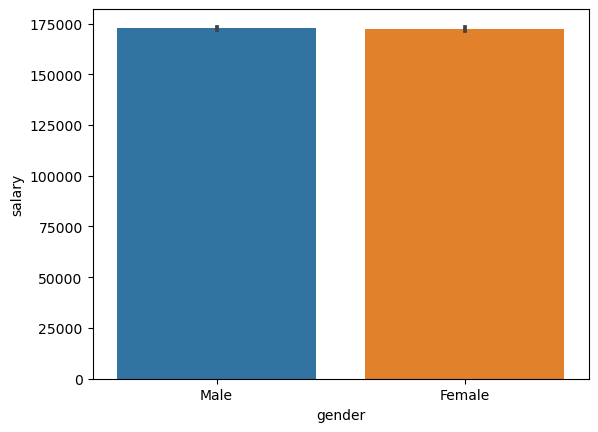

In [100]:
sns.barplot(x = 'gender', y="salary", data=percentile_95th)
plt.show()

In [86]:
np.percentile(data['salary'],75)

101565.0

In [84]:
 np.percentile(data[data['salary'],75])


InvalidIndexError: (0         27500.0
1         35000.0
2         25000.0
3         22000.0
4         27624.0
           ...   
10592    120000.0
10593    158000.0
10594     53000.0
10595     53000.0
10596     58200.0
Name: salary, Length: 10597, dtype: float64, 75)

# Compare Salaries by gender

### Females number more than Males yet they earn lesser total salary as a category

In [ ]:
display(data['gender'].value_counts())
salayr_by_gender = display(data.groupby(['gender'])['salary'].agg(sum))

In [ ]:
salayr_by_gender = display(data.groupby(['gender'])['salary'].agg(np.mean))
salayr_by_gender 

In [ ]:
sns.barplot(x = 'gender', y="salary", data=data)
plt.show()

In [ ]:
sns.boxplot(x = 'gender',y='salary', data=data)
plt.show()

## Distribution of Data

In [ ]:
sns.distplot(data['salary'], bins=20)
plt.show()

In [ ]:
sns.boxplot(x=data['salary'])
plt.show()

# Average salary in the Trump Administration by gender

In [ ]:
trump_data = data.loc[data['served_under'] == 'Trump Administration']


In [ ]:
TrumpAdmin_salayry_by_gender =display(trump_data.groupby(['gender'])['salary'].agg(np.mean))

In [ ]:
sns.barplot(x = 'gender', y="salary", data=trump_data)
plt.show()

# Average salary in the Obama Administration by gender

In [ ]:
obama_data = data.loc[data['served_under'] == 'Obama Administration']


In [ ]:
ObamaAdmin_salayry_by_gender =display(obama_data.groupby(['gender'])['salary'].agg(np.mean))

In [ ]:
sns.barplot(x = 'gender', y="salary", data=obama_data)
plt.show()

#  average salary in the Clinton Administration by gender

In [ ]:
clinton_data = data.loc[data['served_under'] == 'Clinton Administration']


In [ ]:
ClintonAdmin_salayry_by_gender = display(clinton_data.groupby(['gender'])['salary'].agg(np.mean))

In [ ]:
sns.barplot(x = 'gender', y="salary", data=clinton_data)
plt.show()

#  Average salary in the Bush Administration by gender

In [ ]:
bush_data = data[(data['served_under']=="Bush administration")]

In [ ]:
BushAdmin_salayry_by_gender = bush_data.groupby(['gender'])['salary'].agg(np.mean)
BushAdmin_salayry_by_gender


In [ ]:
sns.barplot(x = 'gender', y="salary", data=bush_data)
plt.show()

# Hypothesis Testing:  gender gap in annual salaries

In [ ]:
#Ho: μ1 - μ2 = 0 (There is no difference between the mean annualsalaries of Males and Females in the Whitehouse)
#H1: #Ho: μ1 - μ2 != 0 (There`s difference in the mean annual salaries of females and Males in the Whitehouse)

##### sample sizes of two different samples : Female and Male

In [ ]:
data["gender"].value_counts()

##### degrees of freedom

In [ ]:
Female_sample_size = 5595
Male_sample_size = 5002
degrees_freedom = (Female_sample_size + Male_sample_size) -2
degrees_freedom

##### get mean salary for females

In [ ]:
data_female = data[data["gender"]=="Female"]


In [ ]:
mean_female_salary = data_female["salary"].mean()
mean_female_salary

In [ ]:
#Standard Error female
var_female_salary = data_female["salary"].var()
var_female_salary

##### get mean salary for males

In [ ]:
data_male = data[data["gender"]=="Male"]


In [ ]:
mean_male_salary = data_male["salary"].mean()
mean_male_salary

In [ ]:
# Variance in salary of male
var_male_salary = data_male["salary"].var()
var_male_salary

##### Pooled standard Error

In [ ]:
pooled_sample_standard_error  = np.sqrt((var_male_salary/(Male_sample_size-1)) +(var_female_salary/(Female_sample_size-1)))
pooled_sample_standard_error 

##### difference in means of the 2 samples(female and male)

In [ ]:
difference_in_means = mean_male_salary - mean_female_salary
difference_in_means

## Compute confidence interval

In [ ]:
import scipy.stats
confidence_level = 0.95

confidence_interval = scipy.stats.t.interval(confidence_level, 
                                             degrees_freedom, 
                                             difference_in_means, 
                                             pooled_sample_standard_error)
confidence_interval

#### With 95% confidence, the difference in mean Annual salaries of Females and Males in the Whitehouse is between USD 12,758-USD15,800 

In [ ]:
import scipy.stats as stats
stats.ttest_ind(data_male["salary"], data_female["salary"], equal_var=True)

### since the p-value (8.39451834941693e-76) < alpha = 0.05 so we reject the null hypothesis of the test.
### We can confidently say there was difference in the mean annaul salaries of Females and males in the Whitehouse from 1997-2020.

In [85]:
# Save your work as a csv file.(export as csv)
data.to_csv(' whitehouse_staff.csv', index=False)